<a href="https://colab.research.google.com/github/ShivaniGawande/Shala2020_practice/blob/master/DataScienceBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv")
movies = pd.read_csv("https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv")

In [7]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


In [14]:
#df.MonthlyRate.head(5)
print("Mean",df.MonthlyRate.mean())
print("Max", df.MonthlyRate.max())
print("Min",df.MonthlyRate.min())

Mean 14243.53112840467
Max 26999
Min 2094


In [32]:
print(df.isna().sum())
df.dropna()
df.shape

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

(1028, 34)

In [34]:
mean = df['MonthlyRate'].mean()
std_dev =  df['MonthlyRate'].std()
df['MonthRateNew'] = (df['MonthlyRate'] - mean)/std_dev
df['MonthRateNew'].head(5)

0    0.742749
1    1.512813
2   -1.680795
3    1.264827
4    0.338849
Name: MonthRateNew, dtype: float64

In [35]:
print(movies.isna().sum())

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


In [36]:
movies2 = movies.dropna()
print(movies2.shape)

(572, 31)


In [39]:
movies.loc[movies['runtime'].isnull()]

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
311,312,The End of America,Documentary,Documentary,NaN,Unrated,Indipix,2008,10,1,2009.0,1.0,20.0,7.5,739,Fresh,80,Upright,72,no,no,no,no,no,no,Anne Sundberg,Naomi Wolf,NaN,NaN,NaN,NaN


In [42]:

movies['runtime'] = movies['runtime'].fillna(movies.runtime.mean())
print(movies.isna().sum())


Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


In [43]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
movies["runtime"] = imp.fit_transform(movies[["runtime"]]).ravel()
print(movies.isna().sum())

Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9e8637320>]],
      dtype=object)

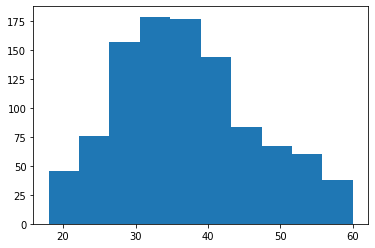

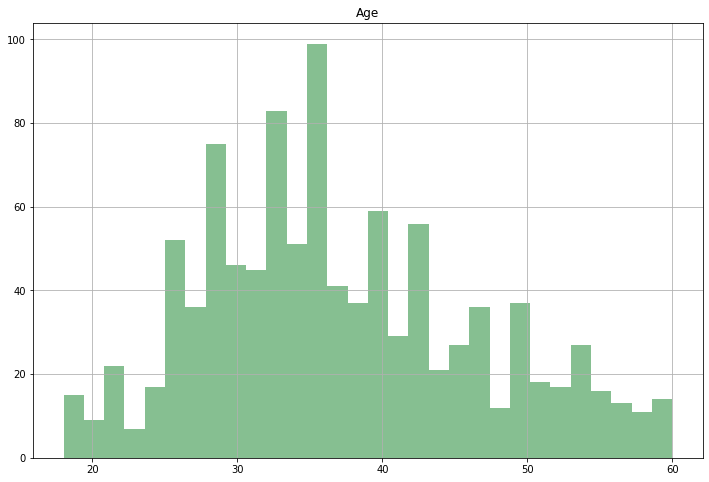

In [49]:
plt.hist(df.Age)
df.hist(column='Age', bins=30, figsize=(12,8), color='#86bf91')

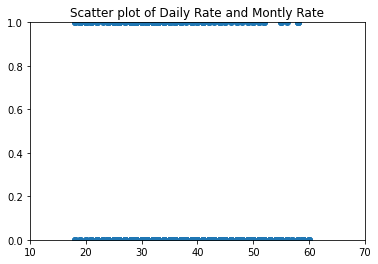

In [53]:
plt.scatter(df.Age, df.Attrition)
plt.xlim(10,70) # imdb varies from 0 to 10
plt.ylim(0,1) # audience varies from 0 to 100
plt.title('Scatter plot of Daily Rate and Montly Rate')
plt.show()

In [56]:

# Get a series of counts of values of Attrition
df['Attrition'].value_counts()

0    856
1    172
Name: Attrition, dtype: int64

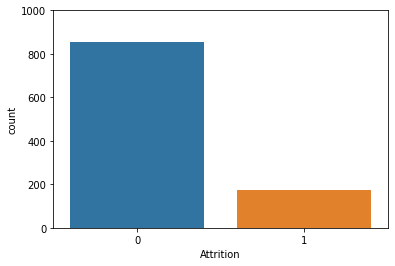

In [55]:


# Draw a countplot for Attrition 
sns.countplot(x = 'Attrition', data = df)
plt.ylim(0, 1000)
plt.show()


Text(0, 0.5, 'Number of Attrition')

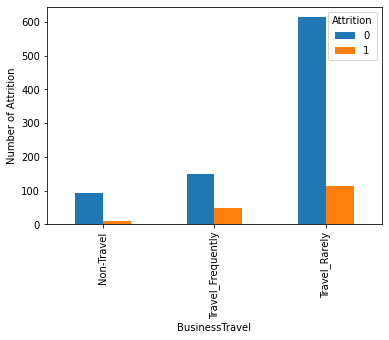

In [60]:
# Draw a cross tab of Attrition and BusinessTravel 
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind = 'bar')
plt.ylabel('Number of Attrition')

Text(0, 0.5, 'Number of Attrition')

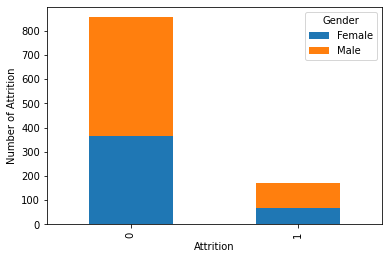

In [61]:
# Draw a stacked bar chart between Attrition and Gender
table = pd.crosstab(df.Attrition, df.Gender)
table.plot(kind='bar', stacked=True)
plt.ylabel('Number of Attrition')

(array([ 65.,  24.,  32., 108.,  87.,  54., 140., 133.,  19.,  61.,  17.,
         21.,  53.,  20.,  15.,  47.,  20.,  16.,  21.,  13.,   2.,  17.,
          6.,   9.,  14.,   3.,   1.,   7.,   1.,   2.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

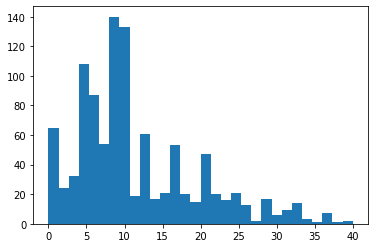

In [63]:

# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df.TotalWorkingYears, bins =30)


(array([156.,  84.,  93., 202.,  57.,  62., 121.,  78.,  23.,  24.,  10.,
         12.,  16.,  11.,   9.,  31.,   9.,   0.,  10.,   3.,   2.,   2.,
          0.,   3.,   6.,   1.,   0.,   2.,   0.,   1.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

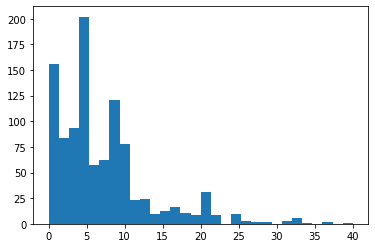

In [64]:

# Draw a histogram of YearsAtCompany
plt.hist(df.YearsAtCompany, bins =30)

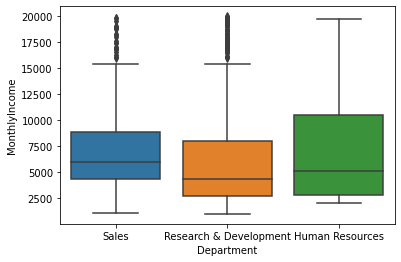

In [65]:

# Draw a boxplot of MonthlyIncome for each Department and report outliers
sns.boxplot('Department', 'MonthlyIncome', data=df)

In [66]:

# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 

Role_counts = df.JobRole.value_counts()
print(Role_counts)

Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64


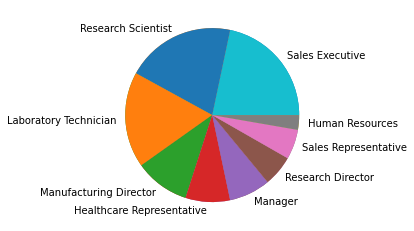

In [68]:
plt.pie(Role_counts)
plt.pie(Role_counts, labels=Role_counts.index.tolist())
plt.show()